Data specification

We work on a data set downloaded here: https://archive.ics.uci.edu/ml/datasets/Wine+Quality 
Datas are related to white Portuguese "Vinho Verde" wine. They are collected by Paulo Cortez, University of Minho, but we don ot know how they were collected. 
The data is split into 9 inputs, for different physicochemical measurements and one output, the wine quality.
As inputs there are: 
1 - fixed acidity       : float
2 - volatile acidity    : float
3 - citric acid         : float
4 - residual sugar      : float
5 - chlorides           : float
6 - free sulfur dioxide : integer
7 - total sulfur dioxide: integer
8 - density             : float
9 - pH                  : float
10 - sulphates          : float
11 - alcohol            : float
And the output is the wine quality, a integer between 0 and 10

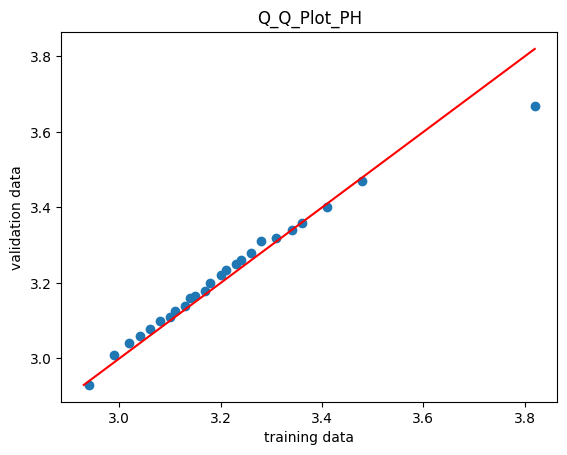

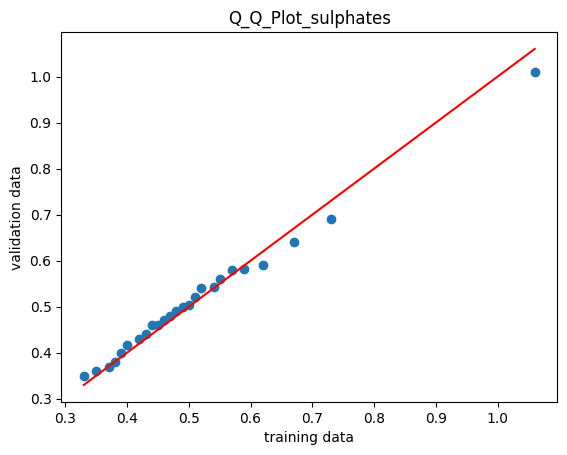

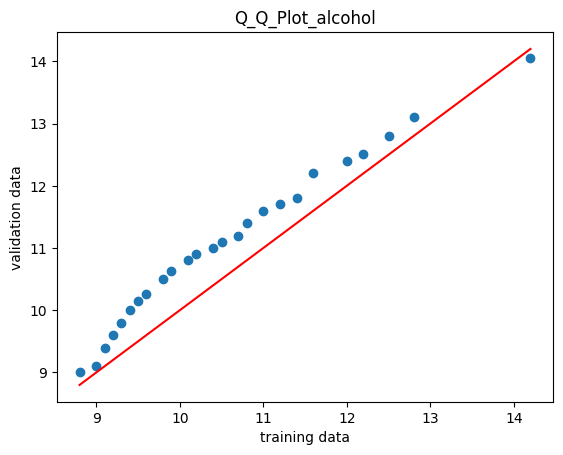

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns


def quantiles(data, n):
    return [data.quantile((i+1)/(n)) for i in range(n) ]

def q_q_plot(data1, data2, n, name):
    data1_quantiles = quantiles(data1, n)
    data2_quantiles = quantiles(data2, n)
    min_datas = min(data1_quantiles[0], data2_quantiles[0])
    max_datas = max(data1_quantiles[-1], data2_quantiles[-1])
    plt.figure()
    plt.scatter(data1_quantiles, data2_quantiles)
    plt.xlabel('training data')
    plt.ylabel('validation data')
    plt.plot([min_datas, max_datas], [min_datas, max_datas], c = 'red')
    plt.title(name)
    plt.show()
    plt.close()


training_dataset = pd.read_csv('winequality-white.csv', sep = ';')
training_pH = training_dataset["pH"]
training_sulphates = training_dataset["sulphates"]
training_alcohol = training_dataset["alcohol"]

validation_dataset = pd.read_csv('winequality-white_validation.csv', sep = ';')
validation_pH = validation_dataset["pH"]
validation_sulphates = validation_dataset["sulphates"]
validation_alcohol = validation_dataset["alcohol"]

q_q_plot(training_pH, validation_pH, 25, "Q_Q_Plot_PH")
display.Image("Q_Q_Plot_PH.png")
q_q_plot(training_sulphates, validation_sulphates, 25, "Q_Q_Plot_sulphates")
q_q_plot(training_alcohol, validation_alcohol, 25, "Q_Q_Plot_alcohol")

The distributions of the training and validation data for ph and sulfates are exactly the same: their q_q plots are linear and have an angle of 45 degrees.
The alcohol q-q plot is a little less linear, it is possible that the data is not independent and identically distributed ...

Define a problem 

In this project we will use the wine data set and especially the alcohol, sulphates and pH levels to predict the quality of a gifted winein order to drink the best wine possible.

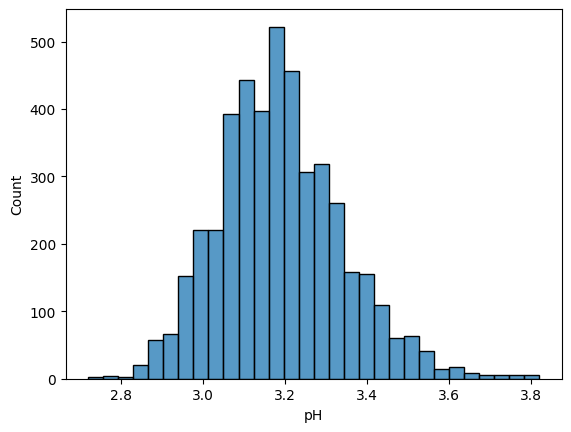

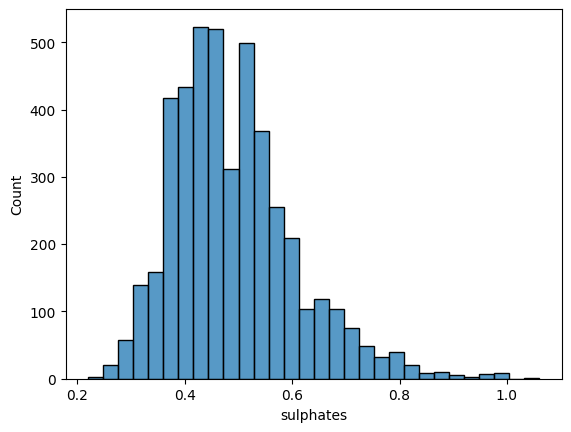

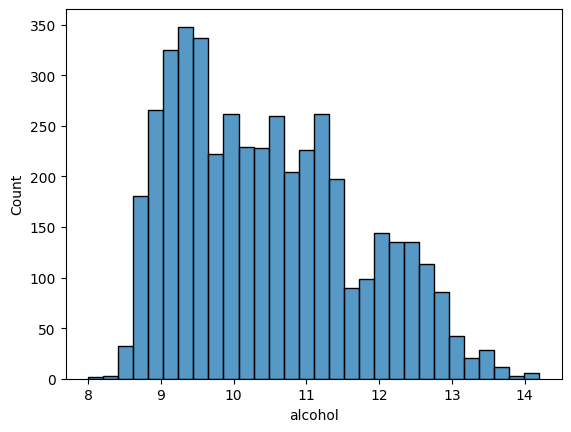

In [2]:
sns.histplot(data=training_dataset, x='pH', bins=30)
plt.xlabel('pH')
plt.show()
sns.histplot(data=training_dataset, x='sulphates', bins=30)
plt.xlabel('sulphates')
plt.show()
sns.histplot(data=training_dataset, x='alcohol', bins=30)
plt.xlabel('alcohol')
plt.show()

<AxesSubplot: xlabel='residual sugar', ylabel='density'>

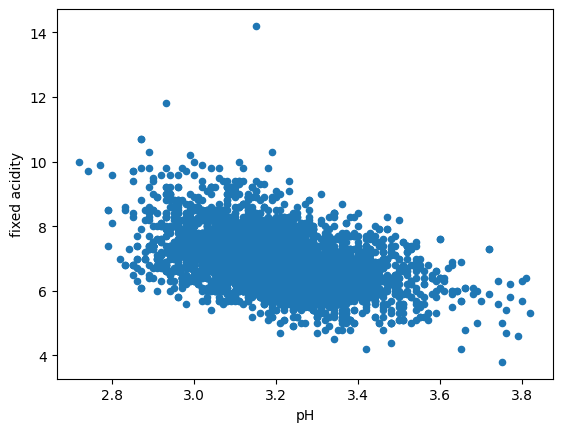

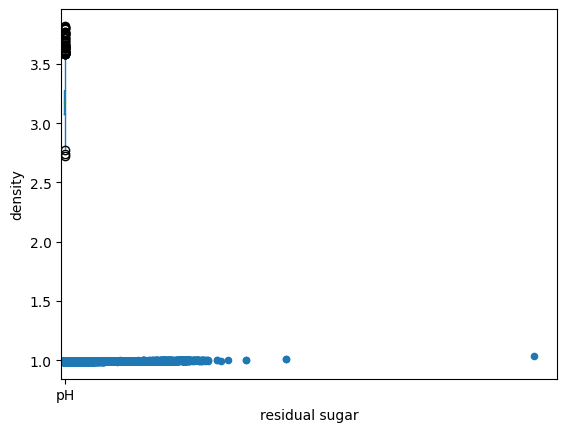

In [5]:
def dependance_graphe(name_column1, name_column2, dataset):
    dataset.plot(x=name_column1, y=name_column2, kind='scatter')
    
dependance_graphe("pH", "fixed acidity", training_dataset)
dependance_graphe("residual sugar", "density", training_dataset)

<AxesSubplot: >

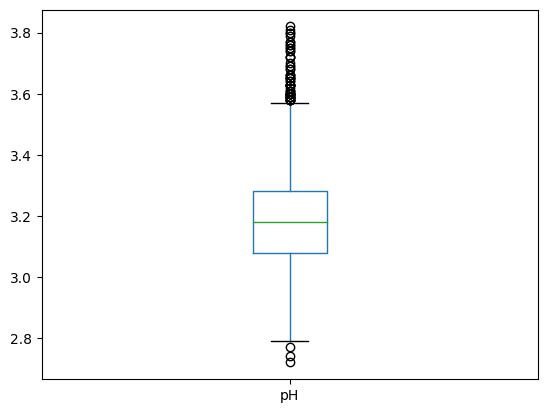

In [6]:
training_dataset.boxplot(column =['pH'], grid = False)